# IRIS DATASET (FLOWER PREDICTION)

# Dataset Information

In [67]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv("Dataset/IRIS.csv")

In [69]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [73]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

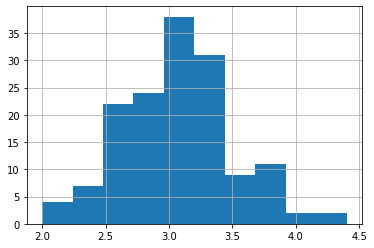

In [74]:
df['sepal_width'].hist()

<AxesSubplot:>

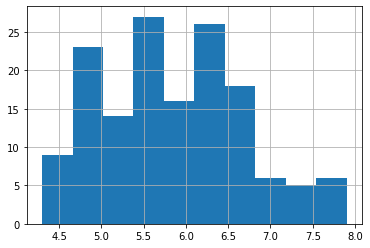

In [75]:
df['sepal_length'].hist()

<AxesSubplot:>

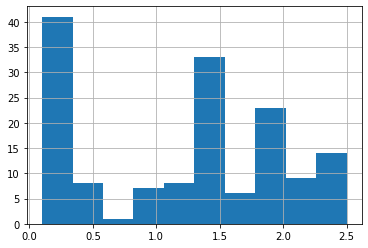

In [76]:
df['petal_width'].hist()

<AxesSubplot:>

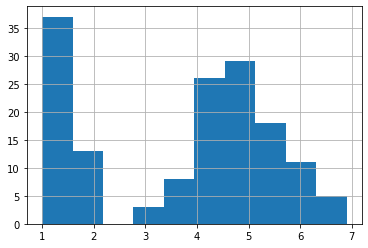

In [77]:
df['petal_length'].hist()

In [78]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

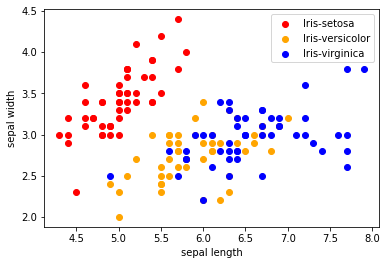

In [79]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.legend()
   

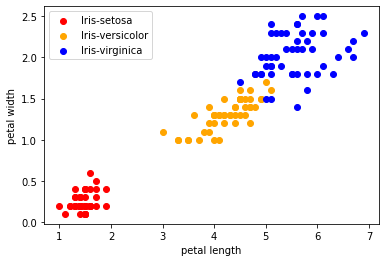

In [80]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel('petal width')
plt.legend()

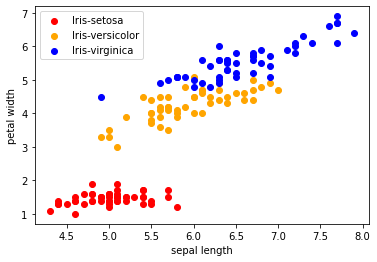

In [81]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel('petal width')
plt.legend()

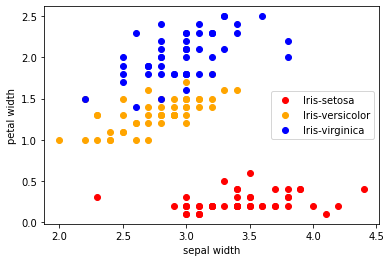

In [82]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel('petal width')
plt.legend()

# Correlation Matrix

In [83]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

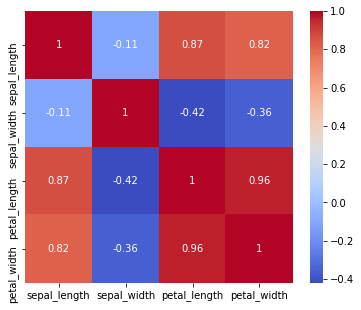

In [84]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax,cmap="coolwarm")

# Model Training

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X=df.drop(columns=['species'])
y=df['species']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [89]:
lg.fit(X_train,y_train)

LogisticRegression()

In [90]:
print("Accuracy:",lg.score(X_test,y_test)*100)

Accuracy: 100.0


In [91]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
print("Accuracy:",kn.score(X_test,y_test)*100)

Accuracy: 100.0


In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy:",dt.score(X_test,y_test)*100)

Accuracy: 100.0


# Save the model

In [93]:
import pickle
pickle.dump(dt,open("model.sav",'wb'))

In [94]:
load_model=pickle.load(open("model.sav",'rb'))

In [95]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [98]:
y_test.head()

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: species, dtype: object

In [99]:
load_model.predict([[6.1,2.8,4.7,1.2]])[0]

'Iris-versicolor'

In [97]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64